# Assignment 4

## Loading the dataset

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
dataset = pd.read_csv("winequality-red.csv")
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Preprocessing

### Checking nulls and corr

In [98]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: >

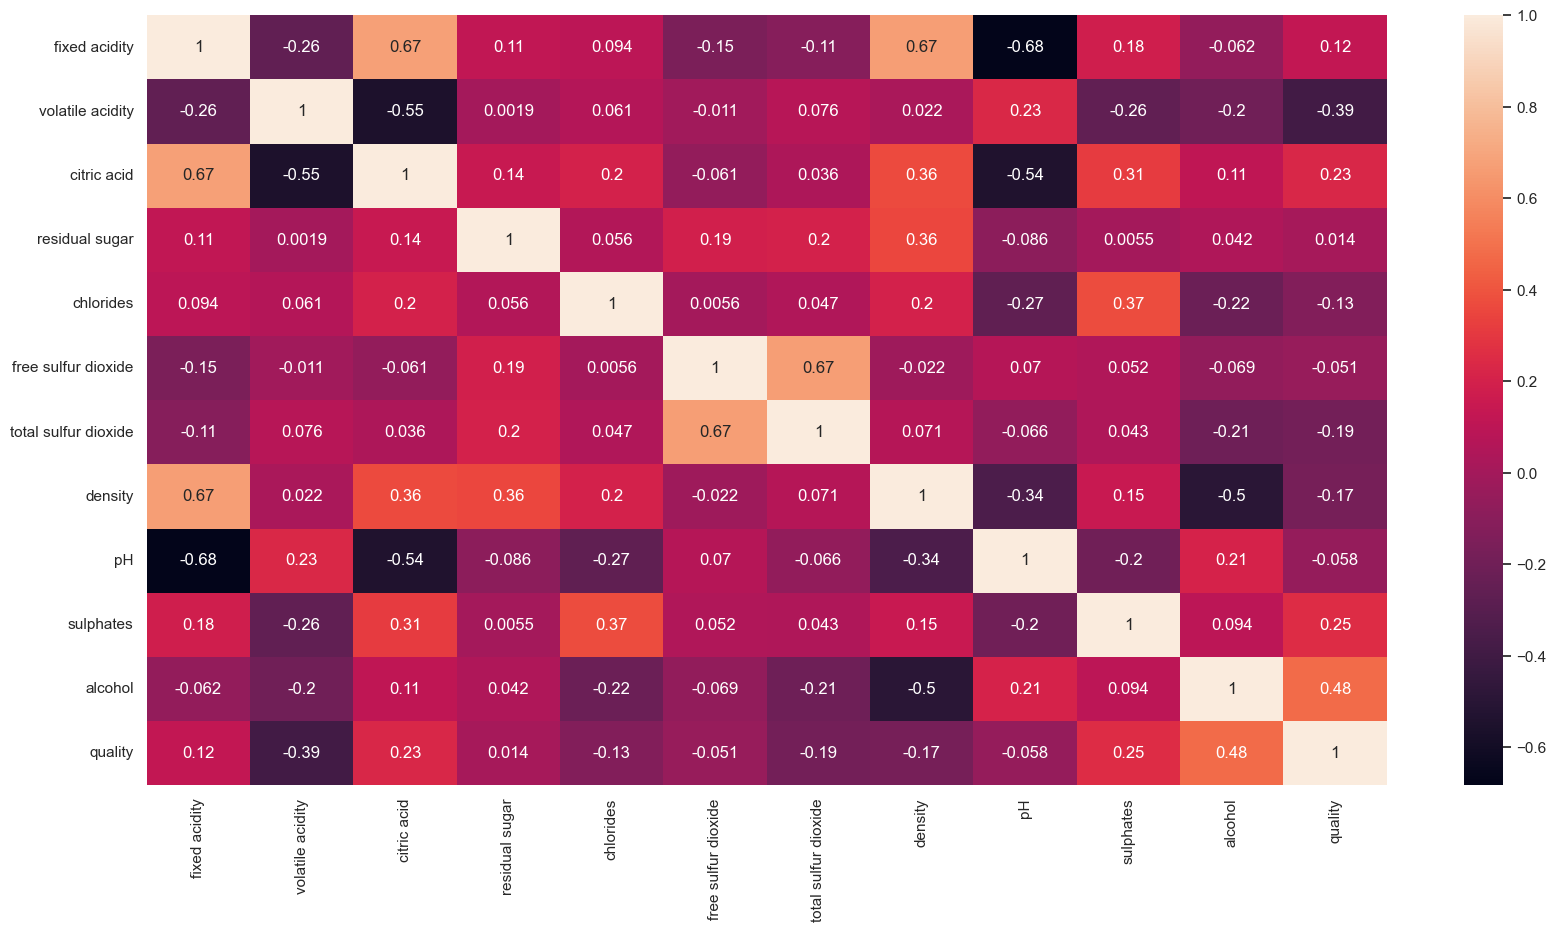

In [99]:
sns.heatmap(dataset.corr(), annot=True)

In [100]:
dataset.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

### Outlier removal

In [101]:
def remove_outliers(column : pd.Series):
    lower_threshold = column.quantile(0.05)
    upper_threshold = column.quantile(0.95)
    return column[(column > lower_threshold) & (column <= upper_threshold)]

(1599, 12)

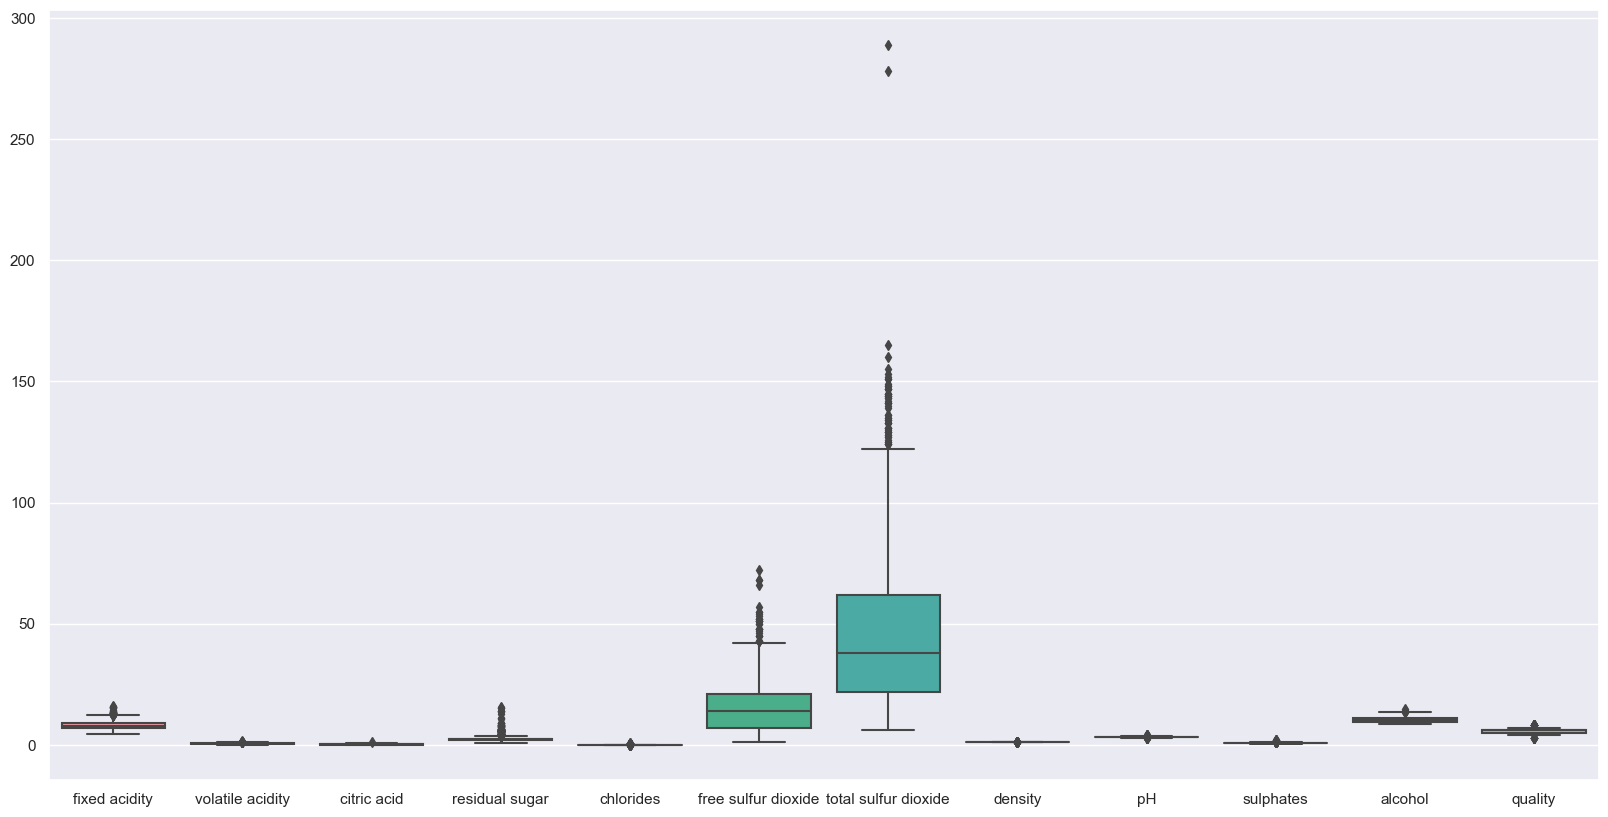

In [102]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(dataset)
dataset.shape

(1599, 12)

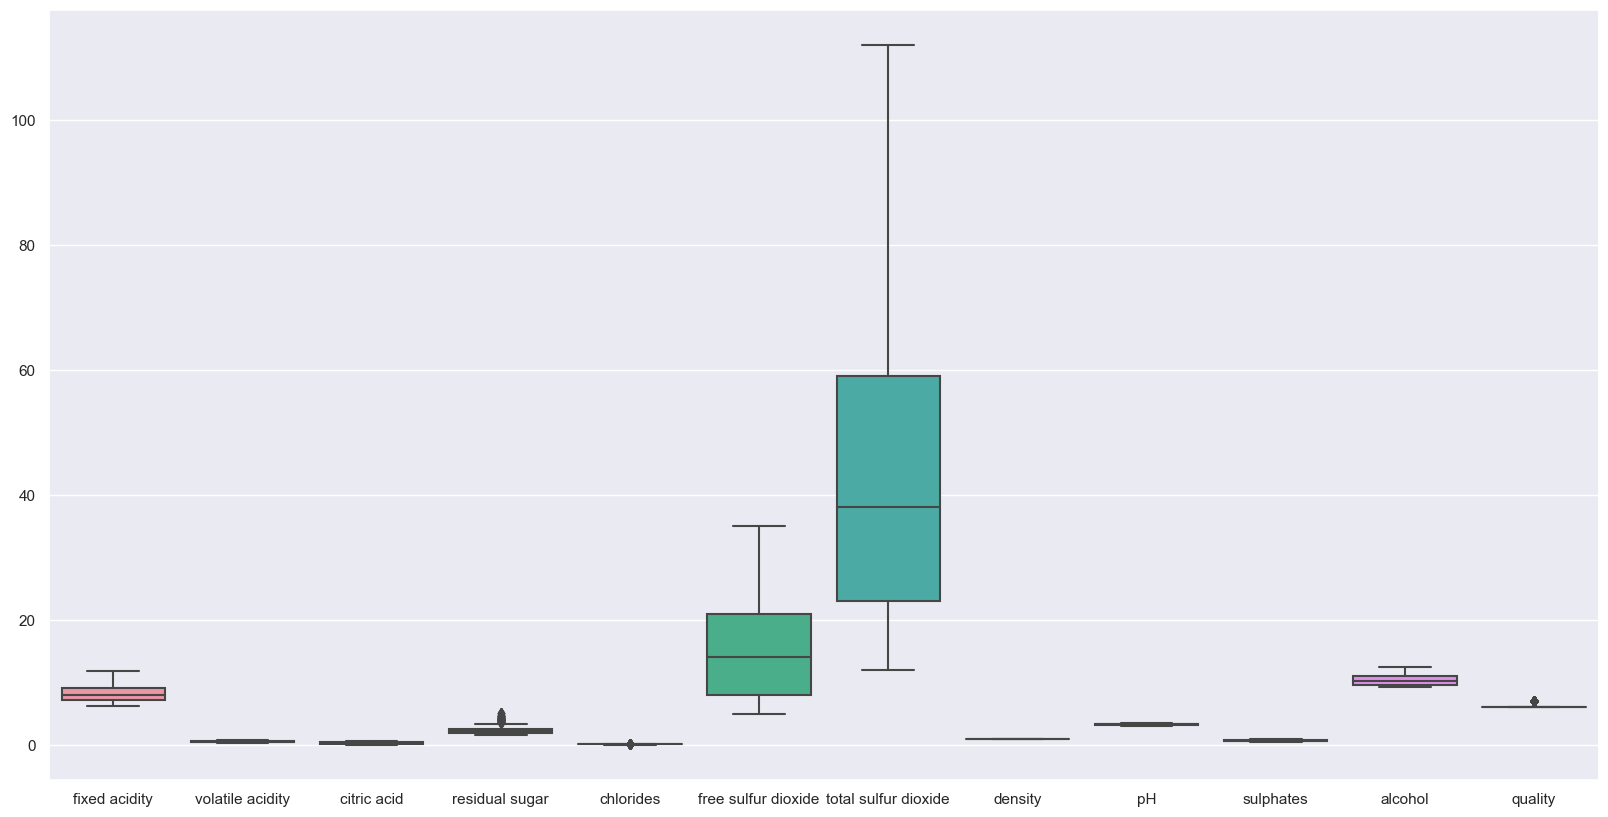

In [103]:
dataset = dataset.apply(remove_outliers)
sns.boxplot(dataset)
dataset.shape

### Splitting into X and y

In [104]:
X = dataset.iloc[ : , : -1]
y = dataset.iloc[:, -1]

### Checking nulls again

In [105]:
dataset.isnull().any()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

In [106]:
def fillna_continous(column : pd.Series):
    c = column.fillna(column.mean())
    return c

X = X.apply(fillna_continous)
y = y.fillna(y.mode().iloc[0])


In [107]:
X.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool

In [108]:
y.isnull().any()

False

### Splitting the data into train and test sets

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [110]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training model

In [111]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

## Testing and evaluating the model

In [112]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred=y_pred, y_true=y_test)

0.925

In [113]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[286,   7],
       [ 17,  10]])

## Testing random record

In [114]:
classifier.predict([[0.5, 0.8, 0.0, 10, 0.75, 15, 8, 0.96, 1.5, 0.01, 9.8]])

array([6.])